In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import plotly.express as px
import dash
from dash.dependencies import Input, Output
import dash_html_components as html
from dash import dcc, html

/tmp/ipykernel_153203/858221959.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
tasa = pd.read_csv("Tasa_de_Desocupacion.csv",encoding='latin-1')

In [3]:
tasa = tasa.drop('Unnamed: 8', axis=1)


In [4]:
tasa=tasa[tasa['Entidad_Federativa']=='Guanajuato'].reset_index()
tasa

,index,Periodo,Trimestre,Entidad_Federativa,Sexo,Poblacion_desocupada_abierta,Poblacion_Economicamente_Activa,Tasa_de_desocupacion,Unnamed: 7
0,22,2012,1,Guanajuato,Hombres,106808.0,1436455.0,7.435527,NaN
1,23,2012,1,Guanajuato,Mujeres,52157.0,906892.0,5.751181,NaN
2,88,2012,2,Guanajuato,Hombres,80900.0,1472323.0,5.494718,NaN
3,89,2012,2,Guanajuato,Mujeres,64682.0,993272.0,6.512013,NaN
4,154,2012,3,Guanajuato,Hombres,89618.0,1521058.0,5.891820,NaN
...,...,...,...,...,...,...,...,...,...
87,2861,2022,4,Guanajuato,Mujeres,38192.0,1131719.0,3.374689,NaN
88,2926,2023,1,Guanajuato,Hombres,48109.0,1757508.0,2.737342,NaN
89,2927,2023,1,Guanajuato,Mujeres,36961.0,1179891.0,3.132578,NaN
90,2992,2023,2,Guanajuato,Hombres,57862.0,1718917.0,3.366189,NaN


In [5]:
year = [2012,2012,2012,2012]
tasa['Fechas']=tasa.index

for a in range(0,91,8):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    tasa['Fechas'][a]=f'ene-mar {year[0]}'
    tasa['Fechas'][a+1]=f'ene-mar {year[0]}'
    year[0]+=1
for b in range(2,91,8):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    tasa['Fechas'][b]=f'abr-jun {year[1]}'
    tasa['Fechas'][b+1]=f'abr-jun {year[1]}'
    year[1]+=1
for c in range(4,91,8):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    tasa['Fechas'][c]=f'jul-sep {year[2]}'
    tasa['Fechas'][c+1]=f'jul-sep {year[2]}'
    year[2]+=1
for d in range(6,91,8):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    tasa['Fechas'][d]=f'oct-dic {year[3]}'
    tasa['Fechas'][d+1]=f'oct-dic {year[3]}'
    year[3]+=1
tasa.drop(columns=['index','Unnamed: 7'])

/tmp/ipykernel_153203/2139285940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasa['Fechas'][a]=f'ene-mar {year[0]}'


,Periodo,Trimestre,Entidad_Federativa,Sexo,Poblacion_desocupada_abierta,Poblacion_Economicamente_Activa,Tasa_de_desocupacion,Fechas
0,2012,1,Guanajuato,Hombres,106808.0,1436455.0,7.435527,ene-mar 2012
1,2012,1,Guanajuato,Mujeres,52157.0,906892.0,5.751181,ene-mar 2012
2,2012,2,Guanajuato,Hombres,80900.0,1472323.0,5.494718,abr-jun 2012
3,2012,2,Guanajuato,Mujeres,64682.0,993272.0,6.512013,abr-jun 2012
4,2012,3,Guanajuato,Hombres,89618.0,1521058.0,5.891820,jul-sep 2012
...,...,...,...,...,...,...,...,...
87,2022,4,Guanajuato,Mujeres,38192.0,1131719.0,3.374689,oct-dic 2022
88,2023,1,Guanajuato,Hombres,48109.0,1757508.0,2.737342,ene-mar 2023
89,2023,1,Guanajuato,Mujeres,36961.0,1179891.0,3.132578,ene-mar 2023
90,2023,2,Guanajuato,Hombres,57862.0,1718917.0,3.366189,abr-jun 2023


In [6]:
tasa = tasa.fillna("")

In [7]:
anio2012 = tasa[tasa['Periodo']==2012]
anio2012

,index,Periodo,Trimestre,Entidad_Federativa,Sexo,Poblacion_desocupada_abierta,Poblacion_Economicamente_Activa,Tasa_de_desocupacion,Unnamed: 7,Fechas
0,22,2012,1,Guanajuato,Hombres,106808.0,1436455.0,7.435527,,ene-mar 2012
1,23,2012,1,Guanajuato,Mujeres,52157.0,906892.0,5.751181,,ene-mar 2012
2,88,2012,2,Guanajuato,Hombres,80900.0,1472323.0,5.494718,,abr-jun 2012
3,89,2012,2,Guanajuato,Mujeres,64682.0,993272.0,6.512013,,abr-jun 2012
4,154,2012,3,Guanajuato,Hombres,89618.0,1521058.0,5.891820,,jul-sep 2012
5,155,2012,3,Guanajuato,Mujeres,64443.0,1031453.0,6.247788,,jul-sep 2012
6,220,2012,4,Guanajuato,Hombres,82681.0,1480879.0,5.583238,,oct-dic 2012
7,221,2012,4,Guanajuato,Mujeres,54683.0,982659.0,5.564799,,oct-dic 2012


In [8]:
hombres = tasa[(tasa['Sexo']=='Hombres')&(tasa['Entidad_Federativa']=='Guanajuato')]
hombres = hombres.reset_index()
hombres['Trimestre_neto']=hombres.index+1
hombres['Fechas']=hombres['Trimestre_neto']
year = [2012,2012,2012,2012]
for a in range(0,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    hombres['Fechas'][a]=f'ene-mar {year[0]}'
    year[0]+=1
for b in range(1,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    hombres['Fechas'][b]=f'abril-jun {year[1]}'
    year[1]+=1
for c in range(2,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    hombres['Fechas'][c]=f'jul-sep {year[2]}'
    year[2]+=1
for d in range(3,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    hombres['Fechas'][d]=f'oct-dic {year[3]}'
    year[3]+=1

    
mujeres = tasa[(tasa['Sexo']=='Mujeres')&(tasa['Entidad_Federativa']=='Guanajuato')]
mujeres = mujeres.reset_index()
mujeres['Trimestre_neto']=mujeres.index+1
mujeres['Fechas']=mujeres['Trimestre_neto']
year = [2012,2012,2012,2012]
for a in range(0,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    mujeres['Fechas'][a]=f'ene-mar {year[0]}'
    year[0]+=1
for b in range(1,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    mujeres['Fechas'][b]=f'abril-jun {year[1]}'
    year[1]+=1
for c in range(2,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    mujeres['Fechas'][c]=f'jul-sep {year[2]}'
    year[2]+=1
for d in range(3,46,4):
    # ene-mar, abril-jun, jul-sep, oct-dic
    # start at 2012
    mujeres['Fechas'][d]=f'oct-dic {year[3]}'
    year[3]+=1



/tmp/ipykernel_153203/2902798352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hombres['Fechas'][a]=f'ene-mar {year[0]}'
/tmp/ipykernel_153203/2902798352.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mujeres['Fechas'][a]=f'ene-mar {year[0]}'


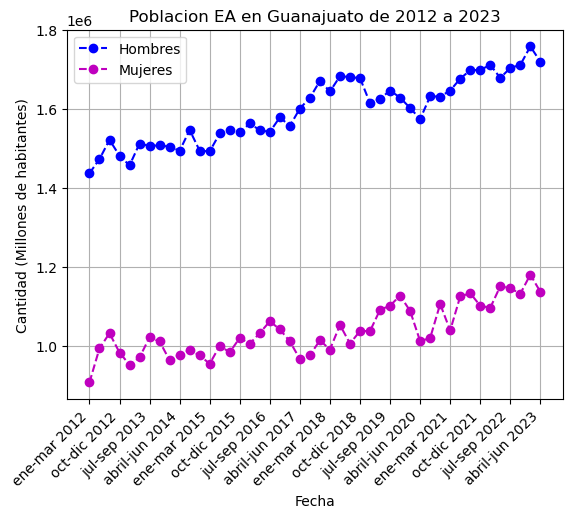

In [9]:
x = hombres['Fechas']
y = hombres['Poblacion_Economicamente_Activa']
z = mujeres['Poblacion_Economicamente_Activa']
fig, ax = plt.subplots()
ax.plot(x, y,'--bo', label='Hombres')
ax.plot(x, z,'--mo', label='Mujeres')
plt.title('Poblacion EA en Guanajuato de 2012 a 2023')
plt.xlabel('Fecha')
plt.ylabel('Cantidad (Millones de habitantes)')
ax.xaxis.set_major_locator(mticker.MultipleLocator(3))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.grid(True)  #or ax.grid()

plt.legend()
plt.show()
# plt.figure(figsize=(38,12))



In [10]:
df=tasa[['Sexo','Periodo','Poblacion_Economicamente_Activa','Entidad_Federativa']]

In [11]:
df2=df.groupby(['Entidad_Federativa','Periodo','Sexo']).sum().reset_index()
df2=df2[df2['Entidad_Federativa']=='Guanajuato']
df2.drop(columns=['Entidad_Federativa'])


,Periodo,Sexo,Poblacion_Economicamente_Activa
0,2012,Hombres,5910715.000
1,2012,Mujeres,3914276.000
2,2013,Hombres,5980864.000
3,2013,Mujeres,3953584.000
4,2014,Hombres,6036510.000
5,2014,Mujeres,3904679.000
6,2015,Hombres,6115207.000
7,2015,Mujeres,3956798.000
8,2016,Hombres,6227039.000
9,2016,Mujeres,4139882.000


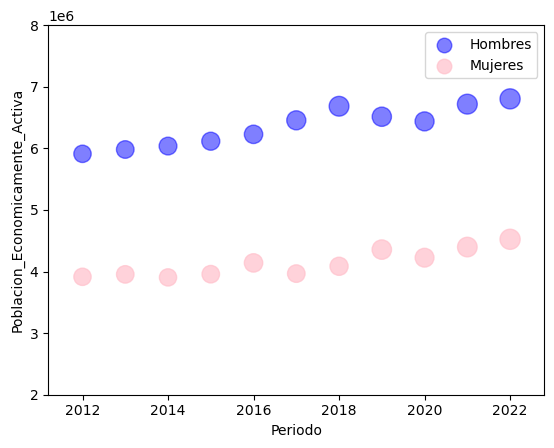

In [12]:
norm_hombres = (df2[df2['Sexo']=='Hombres']['Poblacion_Economicamente_Activa'] - df2[df2['Sexo']=='Hombres']['Poblacion_Economicamente_Activa'].min()) / (df2[df2['Sexo']=='Hombres']['Poblacion_Economicamente_Activa'].max() - df2[df2['Sexo']=='Hombres']['Poblacion_Economicamente_Activa'].min())
ax1 = df2[df2['Sexo']=='Hombres'].plot(kind='scatter',
                    x='Periodo',
                    y='Poblacion_Economicamente_Activa',
                    alpha=0.5,
                    color="blue",s=norm_hombres * 200 + 10,
                    xlim=(2011.2, 2022.8),ylim=(2e6,8e6),label='Hombres'
                    )
norm_mujeres = (df2[df2['Sexo']=='Mujeres']['Poblacion_Economicamente_Activa'] - df2[df2['Sexo']=='Mujeres']['Poblacion_Economicamente_Activa'].min()) / (df2[df2['Sexo']=='Mujeres']['Poblacion_Economicamente_Activa'].max() - df2[df2['Sexo']=='Mujeres']['Poblacion_Economicamente_Activa'].min())
ax1 = df2[df2['Sexo']=='Mujeres'].plot(kind='scatter',
                    x='Periodo',
                    y='Poblacion_Economicamente_Activa',
                    alpha=0.7,
                    color="pink",s=norm_mujeres * 200 + 10,
                    ax=ax1,label="Mujeres"
                    )

<Axes: xlabel='Periodo', ylabel='Poblacion_Economicamente_Activa'>

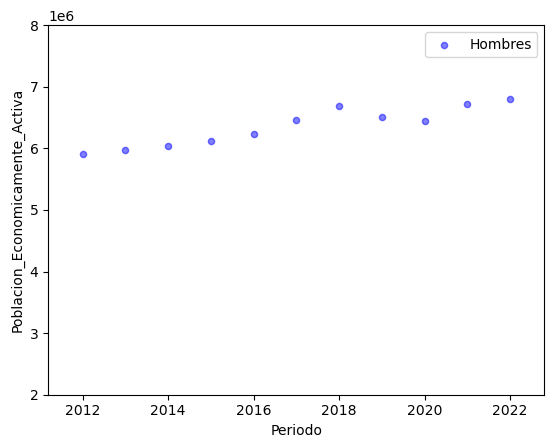

In [13]:
df2[df2['Sexo']=='Hombres'].plot(kind='scatter',
                    x='Periodo',
                    y='Poblacion_Economicamente_Activa',
                    alpha=0.5,
                    color="blue",xlim=(2011.2, 2022.8),ylim=(2e6,8e6),label='Hombres'
                    )

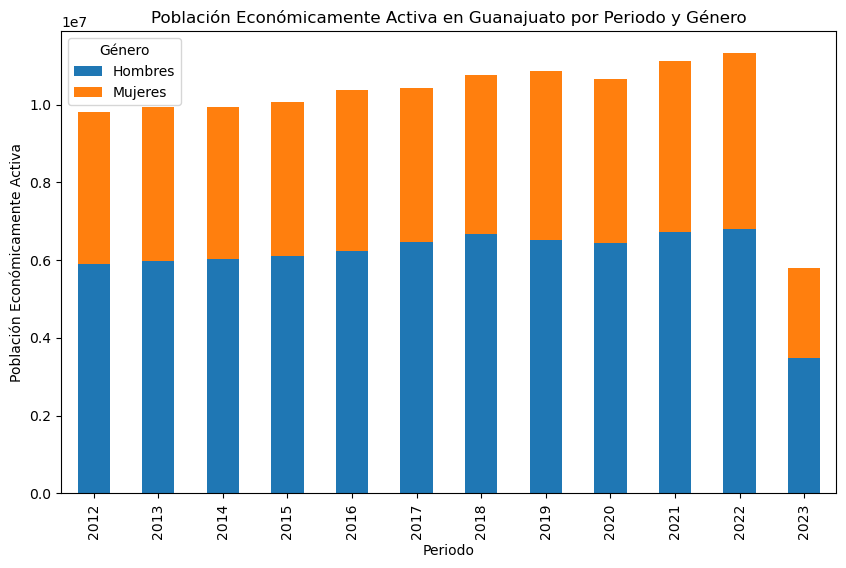

In [14]:
df_pivot = df2.pivot(index='Periodo', columns='Sexo', values='Poblacion_Economicamente_Activa')
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar la gráfica
plt.title('Población Económicamente Activa en Guanajuato por Periodo y Género')
plt.xlabel('Periodo')
plt.ylabel('Población Económicamente Activa')
plt.legend(title='Género')
plt.show()

In [15]:
tasa.sort_values('Periodo')

tasa

,index,Periodo,Trimestre,Entidad_Federativa,Sexo,Poblacion_desocupada_abierta,Poblacion_Economicamente_Activa,Tasa_de_desocupacion,Unnamed: 7,Fechas
0,22,2012,1,Guanajuato,Hombres,106808.0,1436455.0,7.435527,,ene-mar 2012
1,23,2012,1,Guanajuato,Mujeres,52157.0,906892.0,5.751181,,ene-mar 2012
2,88,2012,2,Guanajuato,Hombres,80900.0,1472323.0,5.494718,,abr-jun 2012
3,89,2012,2,Guanajuato,Mujeres,64682.0,993272.0,6.512013,,abr-jun 2012
4,154,2012,3,Guanajuato,Hombres,89618.0,1521058.0,5.891820,,jul-sep 2012
...,...,...,...,...,...,...,...,...,...,...
87,2861,2022,4,Guanajuato,Mujeres,38192.0,1131719.0,3.374689,,oct-dic 2022
88,2926,2023,1,Guanajuato,Hombres,48109.0,1757508.0,2.737342,,ene-mar 2023
89,2927,2023,1,Guanajuato,Mujeres,36961.0,1179891.0,3.132578,,ene-mar 2023
90,2992,2023,2,Guanajuato,Hombres,57862.0,1718917.0,3.366189,,abr-jun 2023


<Figure size 1800x1200 with 0 Axes>

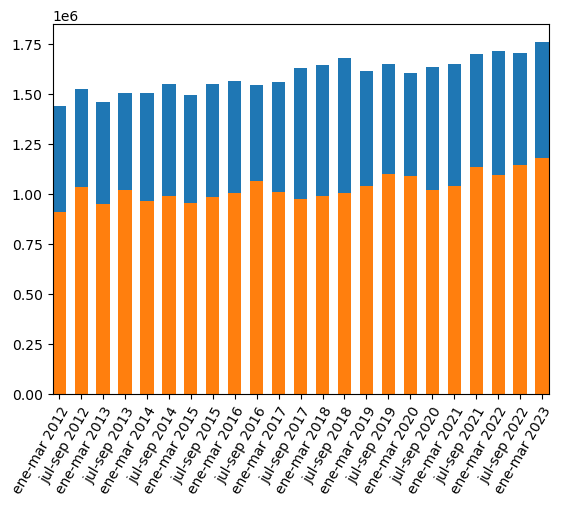

<Figure size 1800x1200 with 0 Axes>

In [16]:
df = tasa[tasa['Sexo']=='Hombres'].groupby(['Fechas'],sort=False)['Poblacion_Economicamente_Activa'].sum()
dfw = tasa[tasa['Sexo']=='Mujeres'].groupby(['Fechas'],sort=False)['Poblacion_Economicamente_Activa'].sum()
man=[]
woman=[]
index_df=[]
k = len(df)
for b in range(0,k,2):
    man.append(df.values[b])
    woman.append(dfw.values[b])
    index_df.append(df.index[b])
man = pd.Series(man, index=index_df)
woman = pd.Series(woman, index=index_df)
plt.bar(man.index,man.values,width=0.6, align='center')
plt.bar(woman.index,woman.values,width=0.6, align='center')
plt.xticks(rotation=60,ha="right", rotation_mode="anchor") 
plt.autoscale(enable=True, axis='x', tight=True) # tight layout
plt.figure(figsize=(18,12))


# df = pd.DataFrame(df.reset_index())
#plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls') 
#type(df_pivot)
#lo = df_pivot.index.get_level_values(1)
#df_pivot[lo=='Hombres']
#ax = df[['Hombres','Mujeres']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("Hour", fontsize=12)
#ax.set_ylabel("V", fontsize=12)
#plt.show()
#ax = df.plot(kind='bar', stacked=False, figsize=(12, 6))
#df.index
#ax2 = df.plot(kind='bar', stacked=False, figsize=(12, 6), color='magenta')
# step every two elements for df 

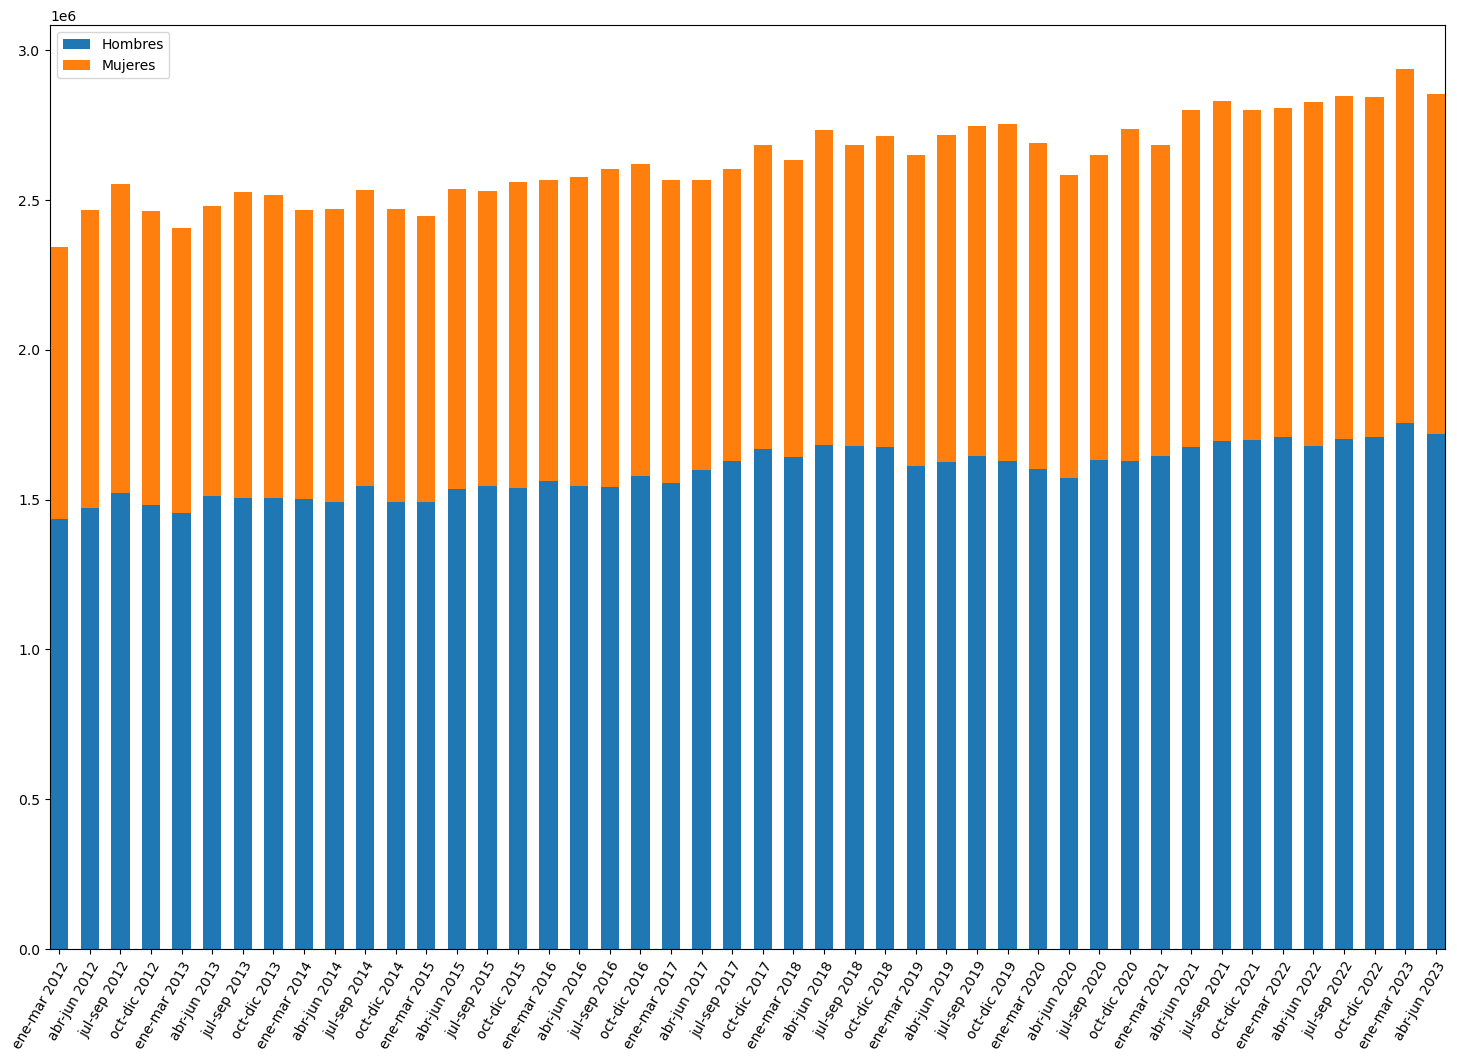

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming tasa is your DataFrame

# Filter data for men and women separately
df = tasa[tasa['Sexo'] == 'Hombres'].groupby(['Fechas'], sort=False)['Poblacion_Economicamente_Activa'].sum()
dfw = tasa[tasa['Sexo'] == 'Mujeres'].groupby(['Fechas'], sort=False)['Poblacion_Economicamente_Activa'].sum()

# Extract data for plotting
man = df.values
woman = dfw.values
index_df = df.index

# Plotting
plt.figure(figsize=(18, 12))

# Plot bars for men
plt.bar(index_df, man, width=0.6, align='center', label='Hombres')

# Plot bars for women on top of men
plt.bar(index_df, woman, width=0.6, align='center', label='Mujeres', bottom=man)

plt.xticks(rotation=60, ha="right", rotation_mode="anchor")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()


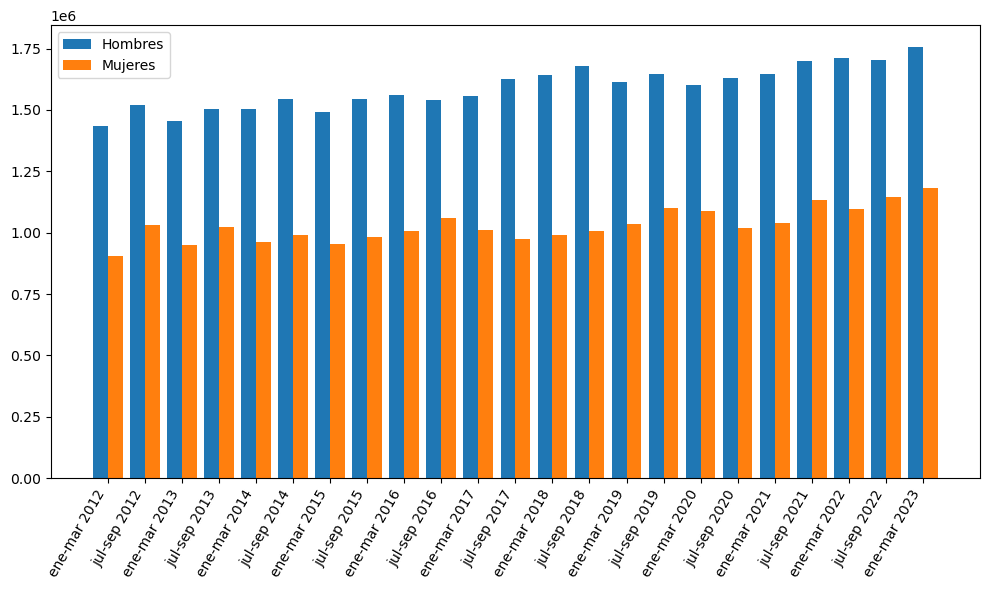

In [18]:
# Group data by Fecha and Sexo
grouped_data = tasa.groupby(['Fechas', 'Sexo'],sort=False).sum().unstack()
grouped_data=grouped_data[::2]
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
bar_positions_man = np.arange(len(grouped_data))
bar_positions_woman = bar_positions_man + bar_width

ax.bar(bar_positions_man, grouped_data['Poblacion_Economicamente_Activa']['Hombres'], width=bar_width, label='Hombres')
ax.bar(bar_positions_woman, grouped_data['Poblacion_Economicamente_Activa']['Mujeres'], width=bar_width, label='Mujeres')

ax.set_xticks(bar_positions_man + bar_width / 2)
ax.set_xticklabels(grouped_data.index, rotation=60, ha='right')

ax.legend()

plt.tight_layout()
plt.show()


In [19]:
grouped_data = tasa.groupby(['Fechas', 'Sexo'],sort=False).sum().unstack()
grouped_data[::2]

index         Periodo         Trimestre          \
Sexo         Hombres Mujeres Hombres Mujeres   Hombres Mujeres   
Fechas                                                           
ene-mar 2012      22      23    2012    2012         1       1   
jul-sep 2012     154     155    2012    2012         3       3   
ene-mar 2013     286     287    2013    2013         1       1   
jul-sep 2013     418     419    2013    2013         3       3   
ene-mar 2014     550     551    2014    2014         1       1   
jul-sep 2014     682     683    2014    2014         3       3   
ene-mar 2015     814     815    2015    2015         1       1   
jul-sep 2015     946     947    2015    2015         3       3   
ene-mar 2016    1078    1079    2016    2016         1       1   
jul-sep 2016    1210    1211    2016    2016         3       3   
ene-mar 2017    1342    1343    2017    2017         1       1   
jul-sep 2017    1474    1475    2017    2017         3       3   
ene-mar 2018    1606    1607    2018    2018         1       1   
jul-sep 2018    1738    1739    2018    2018         3       3   
ene-mar 2019    1870    1871    2019    2019         1       1   
jul-sep 2019    2002    2003    2019    2019         3       3   
ene-mar 2020    2134    2135    2020    2020         1       1   
jul-sep 2020    2266    2267    2020    2020         3       3   
ene-mar 2021    2398    2399    2021    2021         1       1   
jul-sep 2021    2530    2531    2021    2021         3       3   
ene-mar 2022    2662    2663    2022    2022         1       1   
jul-sep 2022    2794    2795    2022    2022         3       3   
ene-mar 2023    2926    2927    2023    2023         1       1   

             Entidad_Federativa             Poblacion_desocupada_abierta  \
Sexo                    Hombres     Mujeres                      Hombres   
Fechas                                                                     
ene-mar 2012         Guanajuato  Guanajuato                     106808.0   
jul-sep 2012         Guanajuato  Guanajuato                      89618.0   
ene-mar 2013         Guanajuato  Guanajuato                      95579.0   
jul-sep 2013         Guanajuato  Guanajuato                      80092.0   
ene-mar 2014         Guanajuato  Guanajuato                      78033.0   
jul-sep 2014         Guanajuato  Guanajuato                      74182.0   
ene-mar 2015         Guanajuato  Guanajuato                      74680.0   
jul-sep 2015         Guanajuato  Guanajuato                      82250.0   
ene-mar 2016         Guanajuato  Guanajuato                      64435.0   
jul-sep 2016         Guanajuato  Guanajuato                      59013.0   
ene-mar 2017         Guanajuato  Guanajuato                      56525.0   
jul-sep 2017         Guanajuato  Guanajuato                      50557.0   
ene-mar 2018         Guanajuato  Guanajuato                      59736.0   
jul-sep 2018         Guanajuato  Guanajuato                      64848.0   
ene-mar 2019         Guanajuato  Guanajuato                      62984.0   
jul-sep 2019         Guanajuato  Guanajuato                      62000.0   
ene-mar 2020         Guanajuato  Guanajuato                      71214.0   
jul-sep 2020         Guanajuato  Guanajuato                     120854.0   
ene-mar 2021         Guanajuato  Guanajuato                     103887.0   
jul-sep 2021         Guanajuato  Guanajuato                     104129.0   
ene-mar 2022         Guanajuato  Guanajuato                      68848.0   
jul-sep 2022         Guanajuato  Guanajuato                      67342.0   
ene-mar 2023         Guanajuato  Guanajuato                      48109.0   

                      Poblacion_Economicamente_Activa             \
Sexo          Mujeres                         Hombres    Mujeres   
Fechas                                                             
ene-mar 2012  52157.0                       1436455.0   906892.0   
jul-sep 2012  64443.0                       15210

In [20]:
data = pd.read_csv("Tasa_de_Desocupacion.csv",encoding='latin-1')
entidades = data[(data['Entidad_Federativa']!='Nacional')&(data['Entidad_Federativa']!='México')&(data['Periodo']==2022)].reset_index(drop=True)
#entidades[entidades['Trimestre']==1].loc['Trimestre']
entidades = entidades.drop(columns=['Unnamed: 7','Unnamed: 8'])
entidades = entidades.replace(1,'jan-mar')
entidades = entidades.replace(2,'abr-jun')
entidades = entidades.replace(3,'jul-sep')
entidades = entidades.replace(4,'oct-dic')
entidades['Fechas']=entidades['Trimestre']
m = len(entidades)
for b in range(m):
    entidades.loc[b,'Fechas']=entidades.loc[b,'Fechas']+' '+str(entidades.loc[b,'Periodo'])
entidad = entidades.groupby(['Entidad_Federativa','Fechas','Sexo'],sort=False).sum().unstack()
# entidad
entidad = entidad[::4]
#A = entidad.loc[:,idx[:,'Entidad_Federativa']]
#entidad.index
entidad

Periodo         Trimestre           \
Sexo                             Hombres Mujeres   Hombres  Mujeres   
Entidad_Federativa  Fechas                                            
Aguascalientes      jan-mar 2022    2022    2022   jan-mar  jan-mar   
Baja California     jan-mar 2022    2022    2022   jan-mar  jan-mar   
Baja California Sur jan-mar 2022    2022    2022   jan-mar  jan-mar   
Campeche            jan-mar 2022    2022    2022   jan-mar  jan-mar   
Coahuila            jan-mar 2022    2022    2022   jan-mar  jan-mar   
Colima              jan-mar 2022    2022    2022   jan-mar  jan-mar   
Chiapas             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Chihuahua           jan-mar 2022    2022    2022   jan-mar  jan-mar   
Ciudad de México    jan-mar 2022    2022    2022   jan-mar  jan-mar   
Durango             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Guanajuato          jan-mar 2022    2022    2022   jan-mar  jan-mar   
Guerrero            jan-mar 2022    2022    2022   jan-mar  jan-mar   
Hidalgo             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Jalisco             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Michoacán           jan-mar 2022    2022    2022   jan-mar  jan-mar   
Morelos             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Nayarit             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Nuevo León          jan-mar 2022    2022    2022   jan-mar  jan-mar   
Oaxaca              jan-mar 2022    2022    2022   jan-mar  jan-mar   
Puebla              jan-mar 2022    2022    2022   jan-mar  jan-mar   
Querétaro           jan-mar 2022    2022    2022   jan-mar  jan-mar   
Quintana Roo        jan-mar 2022    2022    2022   jan-mar  jan-mar   
San Luis Potosí     jan-mar 2022    2022    2022   jan-mar  jan-mar   
Sinaloa             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Sonora              jan-mar 2022    2022    2022   jan-mar  jan-mar   
Tabasco             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Tamaulipas          jan-mar 2022    2022    2022   jan-mar  jan-mar   
Tlaxcala            jan-mar 2022    2022    2022   jan-mar  jan-mar   
Veracruz            jan-mar 2022    2022    2022   jan-mar  jan-mar   
Yucatán             jan-mar 2022    2022    2022   jan-mar  jan-mar   
Zacatecas           jan-mar 2022    2022    2022   jan-mar  jan-mar   

                                 Poblacion_desocupada_abierta            \
Sexo                                                  Hombres   Mujeres   
Entidad_Federativa  Fechas                                                
Aguascalientes      jan-mar 2022                      14398.0    8393.0   
Baja California     jan-mar 2022                      25564.0    8915.0   
Baja California Sur jan-mar 2022                       6769.0    5685.0   
Campeche            jan-mar 2022                       7182.0    6197.0   
Coahuila            jan-mar 2022                      46304.0   28466.0   
Colima              jan-mar 2022                       5766.0    5066.0   
Chiapas             jan-mar 2022                      30052.0   23892.0   
Chihuahua           jan-mar 2022                      23883.0   21226.0   
Ciudad de México    jan-mar 2022                     163713.0  108677.0   
Durango             jan-mar 2022                      16902.0   12473.0   
Guanajuato          jan-mar 2022                      68848.0   33208.0   
Guerrero            jan-mar 2022                      14995.0    7050.0   
Hidalgo             jan-mar 2022                      20701.0    9877.0   
Jalisco             jan-mar 2022                      63000.0   32403.0   
Michoacán           jan-mar 2022                      20621.0   15106.0   
Morelos             jan-mar 2022                       9465.0    6315.0   
Nayarit             jan-mar 2022                      10933.0    7220.0   
Nuevo León          jan-mar 2022                      72008.0   48094.0   
Oaxaca              jan-mar 2022           

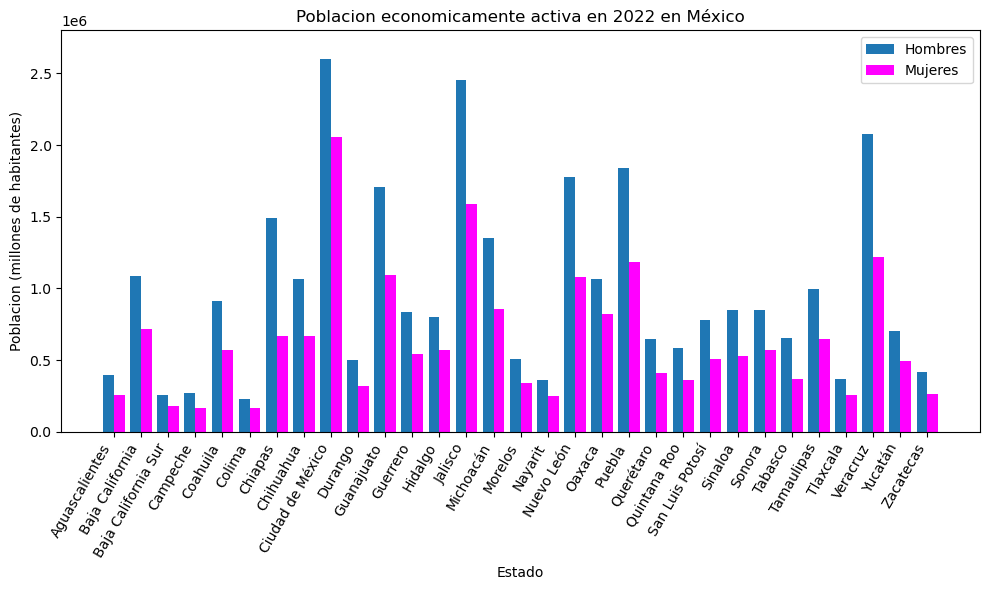

In [21]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
bar_positions_man = np.arange(len(entidad))
bar_positions_woman = bar_positions_man + bar_width

ax.bar(bar_positions_man,entidad['Poblacion_Economicamente_Activa']['Hombres'], width=bar_width, label='Hombres')
ax.bar(bar_positions_woman, entidad['Poblacion_Economicamente_Activa']['Mujeres'], width=bar_width, label='Mujeres',color='magenta')

ax.set_xticks(bar_positions_man + bar_width / 2)
ax.set_xticklabels(entidad.index.get_level_values('Entidad_Federativa'), rotation=60, ha='right')

ax.legend()
plt.title('Poblacion economicamente activa en 2022 en México')
plt.xlabel('Estado')
plt.ylabel('Poblacion (millones de habitantes)')
plt.ylim(0,2.8e6)

plt.tight_layout()
plt.show()

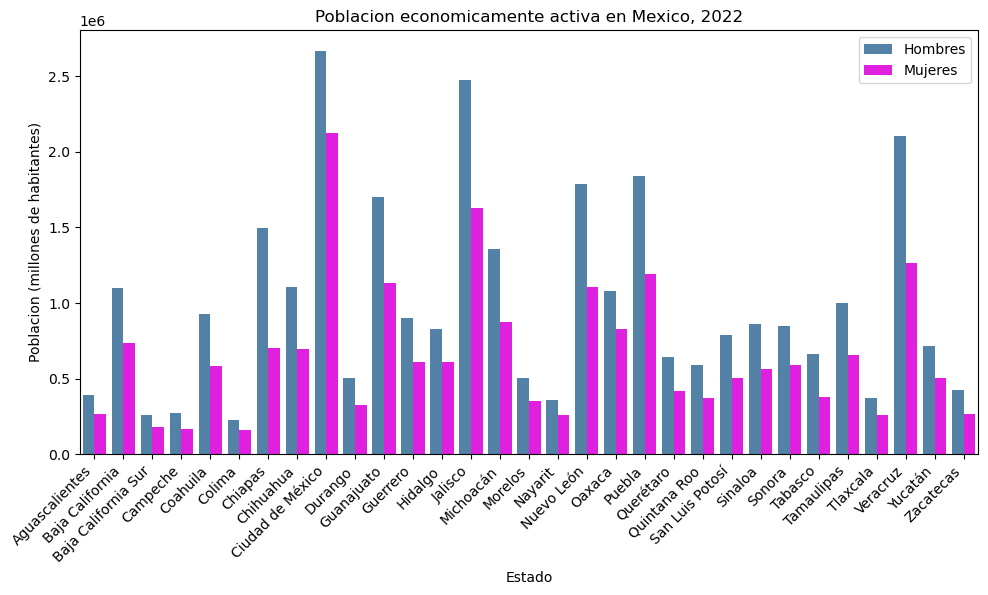

In [22]:
data = pd.read_csv("Tasa_de_Desocupacion.csv",encoding='latin-1')
data = data[(data['Entidad_Federativa']!='Nacional')&(data['Entidad_Federativa']!='México')&(data['Periodo']==2022)].reset_index(drop=True)
data = data.drop(columns=['Unnamed: 7','Unnamed: 8'])  
plt.figure(figsize=(10, 6))   
sns.barplot(x='Entidad_Federativa', y='Poblacion_Economicamente_Activa', hue='Sexo', palette=['steelblue','magenta'],data=data,errorbar=None)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.xlabel('Estado')
plt.ylabel('Poblacion (millones de habitantes)')
plt.title('Poblacion economicamente activa en Mexico, 2022')
plt.legend(loc='upper right')
plt.show()


In [24]:
# Load your data
# link of data: http://datosabiertos.stps.gob.mx/Datos/DIL/clave/Tasa_de_Desocupacion.csv
# url = "http://datosabiertos.stps.gob.mx/Datos/DIL/clave/Tasa_de_Desocupacion.csv"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import plotly.express as px
import dash
from dash.dependencies import Input, Output
import dash_html_components as html
from dash import dcc, html
data = pd.read_csv('Tasa_de_Desocupacion.csv', encoding='latin-1')
data = data[(data['Entidad_Federativa'] != 'Nacional')].reset_index(drop=True)
data = data.drop(columns=['Unnamed: 7', 'Unnamed: 8'])

# Create the Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Población Económicamente Activa en México"),
    
    dcc.Dropdown(
        id='year-dropdown',
        options=[
            {'label': str(year), 'value': year} for year in data['Periodo'].unique()
        ],
        value=data['Periodo'].max(),
        multi=False,
        style={'width': '50%'}
    ),

    dcc.Dropdown(
        id='trimester-dropdown',
        options=[
            {'label': str(trimestre), 'value': trimestre} for trimestre in data['Trimestre'].unique()
        ],
        value=data['Trimestre'].max(),
        multi=False,
        style={'width': '50%'}
    ),
    
    html.Div(
        id='message',
        children='',
        className='centered-message'
    ),
    
    dcc.Graph(id='bar-chart'),
])

# ... (remaining code)


# Define callback to update bar chart
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('message', 'children')],
    [Input('year-dropdown', 'value'),
     Input('trimester-dropdown', 'value')],
    prevent_initial_call=True
)
def update_chart(selected_year, selected_trimester):
    filtered_data = data[(data['Periodo'] == selected_year) & (data['Trimestre'] == selected_trimester)]
    if not filtered_data.empty:
        fig = px.bar(
            filtered_data,
            x='Entidad_Federativa',
            y='Poblacion_Economicamente_Activa',
            color='Sexo',
            barmode='group',
            labels={'Poblacion_Economicamente_Activa': 'Población (millones de habitantes)'},
            color_discrete_sequence = ['steelblue','magenta'],
            title=f'Población Económicamente Activa en {selected_year} - Trimestre {selected_trimester}'
        )
        fig.update_xaxes(tickangle=-60)
        
        return fig, None
    else:
        message = 'No data available for the selected period. Sorry'
        return {},message

# Run the app
if __name__ == '__main__':
    app.run_server(port=8060,debug=True)


In [ ]:
#data[(data['Periodo'] == 2022)&(data['Trimestre'] == 3)]
#url = "http://datosabiertos.stps.gob.mx/Datos/DIL/clave/Tasa_de_Desocupacion.csv"
#data = pd.read_csv(url)
